<a href="https://colab.research.google.com/github/obeabi/ProjectPortfolio/blob/master/FlightCancellation_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Written by Abiola Obembe
# SDS Challenge #1 - Flight Cancellations
## 2020-10-30



## Problem Statement
I have been hired by the US Department of Transportation (DOT) to analyze data from multiple airline carriers in the United States. The DOT wants to help airline carriers reduce the number of flight cancellations and improve travelers' experiences. My job is to help the DOT predict whether or not a flight will be canceled based on the data provided.

### Data Preprocessing Tools

In [41]:

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
!pip install category_encoders
import category_encoders as ce

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

print('Libraries installed successfully!')

Libraries installed successfully!


In [42]:
# Importing the dataset and check the shape and total number of missing values

df_train = pd.read_csv('public_flights.csv')

df_train.head()



,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,CANCELLED
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,205.0,1448,430,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,280.0,2330,750,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,286.0,2296,806,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,285.0,2342,805,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,235.0,1448,320,0


In [43]:
# print target column name as a list
target_column = [df_train.columns[-1]]

print(target_column)

['CANCELLED']


In [44]:
# Importing the train-set nd check the shape and total number of missing values

print("The shape of the train-set is:", (df_train.shape))
print("The number of rows in the train-set is:", str(df_train.shape[0]))
print("The number of columns in the train-set is:", str(df_train.shape[1]))

missing_valuestrain = df_train.isnull().sum().sum()

print("The number of missing values in the train-set is:", str(missing_valuestrain))

The shape of the train-set is: (838858, 14)
The number of rows in the train-set is: 838858
The number of columns in the train-set is: 14
The number of missing values in the train-set is: 5983


In [45]:
# create dataframe for test test
df_test = pd.read_csv('pred_flights.csv')
df_test.head()

,2015,2,25,3,WN,1046,N731SA,LAS,PHX,700,65,255,905
0,2015,2,25,3,WN,2251,N279WN,LAS,RNO,700,80,345,820
1,2015,2,25,3,WN,857,N277WN,LAS,SMF,700,90,397,830
2,2015,2,25,3,WN,2864,N8632A,LAX,BWI,700,295,2329,1455
3,2015,2,25,3,WN,3220,N8659D,LAX,PHX,700,80,370,920
4,2015,2,25,3,WN,2954,N789SW,LGA,HOU,700,265,1428,1025


In [46]:
# test set dataframe is missing headers information so we will re-initailize it, deleting the target column label
labels = df_train.columns
new_label= labels[:-1]

new_label
df_test = pd.read_csv('pred_flights.csv', header =None, names = new_label)

df_test.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL
0,2015,2,25,3,WN,1046,N731SA,LAS,PHX,700,65,255,905
1,2015,2,25,3,WN,2251,N279WN,LAS,RNO,700,80,345,820
2,2015,2,25,3,WN,857,N277WN,LAS,SMF,700,90,397,830
3,2015,2,25,3,WN,2864,N8632A,LAX,BWI,700,295,2329,1455
4,2015,2,25,3,WN,3220,N8659D,LAX,PHX,700,80,370,920


In [47]:
# Importing the test-set and check the shape and total number of missing values

print("The shape of the test-set is:", (df_test.shape))
print("The number of rows in the test-set is:", str(df_test.shape[0]))
print("The number of columns in the test-set is:", str(df_test.shape[1]))

missing_valuestest = df_test.isnull().sum().sum()

print("The number of missing values in the test-set is:", str(missing_valuestest))

The shape of the test-set is: (209717, 13)
The number of rows in the test-set is: 209717
The number of columns in the test-set is: 13
The number of missing values in the test-set is: 1769


### Feature Engineering

In [48]:
# Examine the data types for train dataframe
df_train.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
SCHEDULED_TIME         float64
DISTANCE                 int64
SCHEDULED_ARRIVAL        int64
CANCELLED                int64
dtype: object

In [49]:
# Check for data frame info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838858 entries, 0 to 838857
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 838858 non-null  int64  
 1   MONTH                838858 non-null  int64  
 2   DAY                  838858 non-null  int64  
 3   DAY_OF_WEEK          838858 non-null  int64  
 4   AIRLINE              838858 non-null  object 
 5   FLIGHT_NUMBER        838858 non-null  int64  
 6   TAIL_NUMBER          832877 non-null  object 
 7   ORIGIN_AIRPORT       838858 non-null  object 
 8   DESTINATION_AIRPORT  838858 non-null  object 
 9   SCHEDULED_DEPARTURE  838858 non-null  int64  
 10  SCHEDULED_TIME       838856 non-null  float64
 11  DISTANCE             838858 non-null  int64  
 12  SCHEDULED_ARRIVAL    838858 non-null  int64  
 13  CANCELLED            838858 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 89.6+ MB


In [50]:
# Dealing with missing values in the train-set

df_train.isnull().sum()

YEAR                      0
MONTH                     0
DAY                       0
DAY_OF_WEEK               0
AIRLINE                   0
FLIGHT_NUMBER             0
TAIL_NUMBER            5981
ORIGIN_AIRPORT            0
DESTINATION_AIRPORT       0
SCHEDULED_DEPARTURE       0
SCHEDULED_TIME            2
DISTANCE                  0
SCHEDULED_ARRIVAL         0
CANCELLED                 0
dtype: int64

#### Step 1: Dealing with Missing Values: Tail_number and scheduled_time columns specifically in this project

##### Numerical columns

In [51]:
# Find numerical columns from df_train dataframe
num_columns = df_train.select_dtypes(include = [int, float]).columns
num_sets, target_set = (set(num_columns)), set(target_column)
num_sets = num_sets - target_set
num_cats = list(num_sets)
num_cats

['SCHEDULED_TIME',
 'DISTANCE',
 'YEAR',
 'SCHEDULED_DEPARTURE',
 'MONTH',
 'DAY_OF_WEEK',
 'DAY',
 'FLIGHT_NUMBER',
 'SCHEDULED_ARRIVAL']

In [52]:
# Select missing numerical variables and ensure it confims with earlier observation
num_missing = []

for cols in num_cats:
   if df_train[cols].isnull().sum() > 0:
     num_missing.append(cols)
   else:
     pass
  
num_missing


['SCHEDULED_TIME']

In [53]:
# Mean/Median/Mode, Random, End of distribution Imputation
def impute_nan(df, variable):
  #df[variable+"_median"] = df[variable].fillna(df[variable].median() )
  df[variable+"_mean"] = df[variable].fillna(df[variable].mean() )
  #df[variable+"_mode"] = df[variable].fillna(df[variable].mode() )
  #df[variable+"_random"]=df[variable]
  #df[variable+"_end_distribution"]=df[variable].fillna(df[variable].mean()+3*df[variable].std() )
  #df[variable+'_zero']=df[variable].fillna(0)
  #df[variable+'_hundred']=df[variable].fillna(100)
  ##It will have the random sample to fill the na
  #random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
  ##pandas need to have same index in order to merge the dataset
  #random_sample.index=df[df[variable].isnull()].index
  #df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [54]:
# Fill missing values of the numerical categories column of df_train with median values
for cols in num_missing:
    impute_nan(df_train, cols)

df_train.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,CANCELLED,SCHEDULED_TIME_mean
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,205.0,1448,430,0,205.0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,280.0,2330,750,0,280.0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,286.0,2296,806,0,286.0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,285.0,2342,805,0,285.0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,235.0,1448,320,0,235.0


In [55]:
# Check of missing values still exist
df_train.isnull().sum()

YEAR                      0
MONTH                     0
DAY                       0
DAY_OF_WEEK               0
AIRLINE                   0
FLIGHT_NUMBER             0
TAIL_NUMBER            5981
ORIGIN_AIRPORT            0
DESTINATION_AIRPORT       0
SCHEDULED_DEPARTURE       0
SCHEDULED_TIME            2
DISTANCE                  0
SCHEDULED_ARRIVAL         0
CANCELLED                 0
SCHEDULED_TIME_mean       0
dtype: int64

In [56]:
# Let's manually investigate the std of the newly created column and original column


print("The standard deviation for the orignal column is", df_train.SCHEDULED_TIME.std())

print("The standard deviation for the newly encoded column (random imputter) is", df_train.SCHEDULED_TIME_mean.std())

The standard deviation for the orignal column is 74.62359831105842
The standard deviation for the newly encoded column (random imputter) is 74.62350935234103


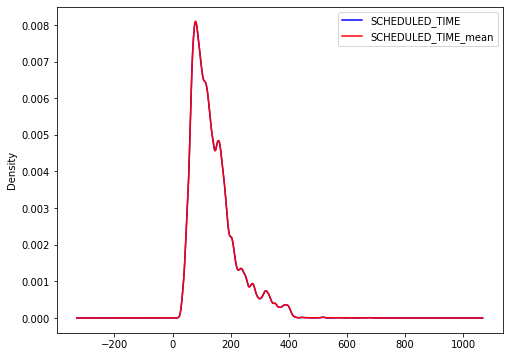

In [57]:
# Plot kde distributions of both distributions
fig = plt.figure(figsize= (8,6))
ax = fig.add_subplot(111)
df_train.SCHEDULED_TIME.plot(kind='kde', ax=ax, color = 'blue')
df_train.SCHEDULED_TIME_mean.plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

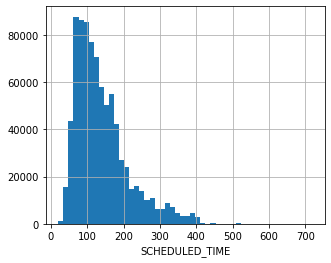

In [58]:
# Plot histogram of SCHEDULED_TIME
df_train. SCHEDULED_TIME.hist(bins=50)
plt.xlabel('SCHEDULED_TIME')
plt.show()

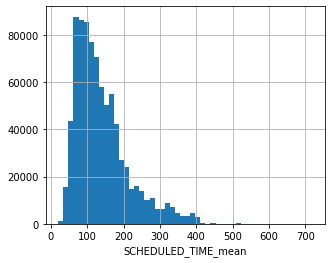

In [59]:
# Plot histogram of SCHEDULED_TIME_end_distribution
df_train['SCHEDULED_TIME_mean'].hist(bins=50)
plt.xlabel('SCHEDULED_TIME_mean')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


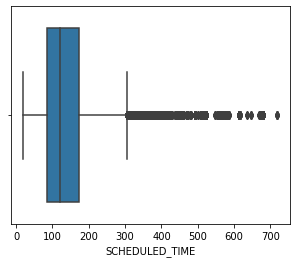

In [60]:
# Boxplot of column
sns.boxplot('SCHEDULED_TIME',data=df_train)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


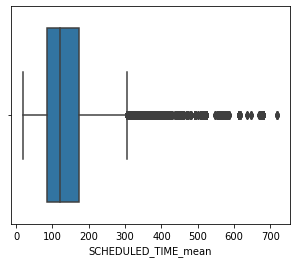

In [61]:
# Boxplot of column
sns.boxplot('SCHEDULED_TIME_mean',data=df_train)
plt.show()

In [62]:
# Let's extract the final datframe with numerical columns with no missing values to be employed by our model

num_columns = df_train.select_dtypes(include = [int, float]).columns
num_sets = (set(num_columns))
num_cats = list(num_sets)
num_cats


['SCHEDULED_TIME',
 'DISTANCE',
 'YEAR',
 'SCHEDULED_DEPARTURE',
 'MONTH',
 'CANCELLED',
 'DAY_OF_WEEK',
 'SCHEDULED_TIME_mean',
 'DAY',
 'FLIGHT_NUMBER',
 'SCHEDULED_ARRIVAL']

In [63]:
# Print the status of missing values for the numerical columns of the dataframe in order to determine column to drop
df_train_num = df_train[num_cats]
df_train_num.isnull().sum()

SCHEDULED_TIME         2
DISTANCE               0
YEAR                   0
SCHEDULED_DEPARTURE    0
MONTH                  0
CANCELLED              0
DAY_OF_WEEK            0
SCHEDULED_TIME_mean    0
DAY                    0
FLIGHT_NUMBER          0
SCHEDULED_ARRIVAL      0
dtype: int64

In [64]:
# Create final dataframe with only numerical columns only by dropping columns with missing values above
df_train_num_final = df_train_num.drop(['SCHEDULED_TIME'], axis = 1)

df_train_num_final.head()

,DISTANCE,YEAR,SCHEDULED_DEPARTURE,MONTH,CANCELLED,DAY_OF_WEEK,SCHEDULED_TIME_mean,DAY,FLIGHT_NUMBER,SCHEDULED_ARRIVAL
0,1448,2015,5,1,0,4,205.0,1,98,430
1,2330,2015,10,1,0,4,280.0,1,2336,750
2,2296,2015,20,1,0,4,286.0,1,840,806
3,2342,2015,20,1,0,4,285.0,1,258,805
4,1448,2015,25,1,0,4,235.0,1,135,320


##### Categorical Columns : Hndling Missing Values

In [65]:
# Select categorical columns
df_train_cat = df_train.copy()
cat_cols = df_train_cat.select_dtypes(exclude=['int', 'float']).columns
cat_set = set(cat_cols) - target_set
catt_cols = list(cat_cols)
catt_cols

['AIRLINE', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']

In [66]:
# Check for the categorical columns with missing values and corroborate with earlier findings
df_train_catcols = df_train_cat[catt_cols]
df_train_catcols.isnull().sum().sort_values()

AIRLINE                   0
ORIGIN_AIRPORT            0
DESTINATION_AIRPORT       0
TAIL_NUMBER            5981
dtype: int64

In [67]:
# Select missing categorical variables and ensure it confims with earlier observation
cat_missing = []

for cols in df_train_catcols.columns:
   if df_train_catcols[cols].isnull().sum() > 0:
     cat_missing.append(cols)
   else:
     pass
  
cat_missing

['TAIL_NUMBER']

In [68]:
# Lets check the amount of unique values in each column with missing values

for col in cat_missing:
  print('----------------------------------------------')
  print(col)
  print('The number of unique values in column named', col, 'is', ( df_train_catcols[col].unique()).shape[0])
  print('The mode of distribution for the values in column named', col, 'is', ( df_train_catcols[col].mode()[0]))

----------------------------------------------
TAIL_NUMBER
The number of unique values in column named TAIL_NUMBER is 4479
The mode of distribution for the values in column named TAIL_NUMBER is N477HA


In [69]:
# We will not implement one-hot encoding because it is impractical to create 4478 additional columns/feature hence we will
#create imputer function for categorical columns based on the mode in specific column
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable +'_mode'] = df[variable].fillna(most_frequent_category)
    return df[variable +'_mode'] 

In [70]:
# Apply function on categorical columns

for feature in cat_missing:
    impute_nan(df_train_catcols,feature)

df_train_catcols.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,TAIL_NUMBER_mode
0,AS,N407AS,ANC,SEA,N407AS
1,AA,N3KUAA,LAX,PBI,N3KUAA
2,US,N171US,SFO,CLT,N171US
3,AA,N3HYAA,LAX,MIA,N3HYAA
4,AS,N527AS,SEA,ANC,N527AS


In [71]:
# Let's confirm the total missing values in categorical dataframe
missing_values_final = []

for cols in df_train_catcols.columns:
   if df_train_catcols[cols].isnull().sum() > 0:
     missing_values_final.append(cols)
   else:
     pass

print(missing_values_final)

['TAIL_NUMBER']


In [72]:
# Now let us drop column with missing values 
df_train_catcols.dropna(axis = 1, inplace= True)

df_train_catcols.head()

df_train_cat_base = df_train_catcols.copy()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Step 2: Handling Categorical Data (Label, One-Hot, Target, Count and Catboost Encoding)

In [73]:
# Let's check the number of unique values in each categorical column
for cols in df_train_catcols.columns:
  print ("For column name :", cols)
  print("The number of unique values are :" ,len(df_train_catcols[cols].unique()))
  print("-------------")


For column name : AIRLINE
The number of unique values are : 14
-------------
For column name : ORIGIN_AIRPORT
The number of unique values are : 315
-------------
For column name : DESTINATION_AIRPORT
The number of unique values are : 315
-------------
For column name : TAIL_NUMBER_mode
The number of unique values are : 4478
-------------


#### Label Encoding

In [74]:
from sklearn.preprocessing import LabelEncoder
cat_features = df_train_catcols.columns
encoder = LabelEncoder()

# Apply label encoder to data
encoded =  df_train_catcols[cat_features].apply(encoder.fit_transform)


In [75]:
# We collect all of these features (numerical and categorical) in a new dataframe that we can use to train a base model
df_train_bl = df_train_num_final.join(encoded)
df_train_bl.head()

,DISTANCE,YEAR,SCHEDULED_DEPARTURE,MONTH,CANCELLED,DAY_OF_WEEK,SCHEDULED_TIME_mean,DAY,FLIGHT_NUMBER,SCHEDULED_ARRIVAL,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,TAIL_NUMBER_mode
0,1448,2015,5,1,0,4,205.0,1,98,430,1,15,271,1507
1,2330,2015,10,1,0,4,280.0,1,2336,750,0,171,229,1457
2,2296,2015,20,1,0,4,286.0,1,840,806,11,272,64,378
3,2342,2015,20,1,0,4,285.0,1,258,805,0,171,198,1417
4,1448,2015,25,1,0,4,235.0,1,135,320,1,271,15,2000


In [76]:
# Display details of dataframe
print("The shape of the label-encoded train-set is:", (df_train_bl.shape))
print("The number of rows in the label-encoded train-set is:", str(df_train_bl.shape[0]))
print("The number of columns in the label-encoded train-set is:", str(df_train_bl.shape[1]))

missing_valuestrain = df_train_bl.isnull().sum().sum()

print("The number of missing values in the label-encoded train-set is:", str(missing_valuestrain))

The shape of the label-encoded train-set is: (838858, 14)
The number of rows in the label-encoded train-set is: 838858
The number of columns in the label-encoded train-set is: 14
The number of missing values in the label-encoded train-set is: 0


#### Count Encoding

In [77]:
# Let's recall the original categorical dataframe before any encoding

df_train_cat_base.head()

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,TAIL_NUMBER_mode
0,AS,ANC,SEA,N407AS
1,AA,LAX,PBI,N3KUAA
2,US,SFO,CLT,N171US
3,AA,LAX,MIA,N3HYAA
4,AS,SEA,ANC,N527AS


In [78]:
# Create the  Count encoder object
df_train_cat_ce = df_train_cat_base.copy()
count_enc = ce.CountEncoder()

# Apply the count encoder to dataframe
count_encoded = count_enc.fit_transform(df_train_cat_ce).add_suffix('_ce')
count_encoded.head()




,AIRLINE_ce,ORIGIN_AIRPORT_ce,DESTINATION_AIRPORT_ce,TAIL_NUMBER_mode_ce
0,23749,2073,15058,194
1,78335,30867,4353,158
2,59437,22819,16524,195
3,78335,30867,11867,152
4,23749,15064,2059,184


In [79]:
# We collect all of these features (numerical and categorical) in a new dataframe that we can use to train a count encoder-based model
df_train_ce = df_train_num_final.join(count_encoded)
df_train_ce.head()

,DISTANCE,YEAR,SCHEDULED_DEPARTURE,MONTH,CANCELLED,DAY_OF_WEEK,SCHEDULED_TIME_mean,DAY,FLIGHT_NUMBER,SCHEDULED_ARRIVAL,AIRLINE_ce,ORIGIN_AIRPORT_ce,DESTINATION_AIRPORT_ce,TAIL_NUMBER_mode_ce
0,1448,2015,5,1,0,4,205.0,1,98,430,23749,2073,15058,194
1,2330,2015,10,1,0,4,280.0,1,2336,750,78335,30867,4353,158
2,2296,2015,20,1,0,4,286.0,1,840,806,59437,22819,16524,195
3,2342,2015,20,1,0,4,285.0,1,258,805,78335,30867,11867,152
4,1448,2015,25,1,0,4,235.0,1,135,320,23749,15064,2059,184


In [80]:
# Display details of dataframe
print("The shape of the count-encoded train-set is:", (df_train_ce.shape))
print("The number of rows in the count-encoded train-set is:", str(df_train_ce.shape[0]))
print("The number of columns in the count-encoded train-set is:", str(df_train_ce.shape[1]))

missing_valuestrain = df_train_ce.isnull().sum().sum()

print("The number of missing values in the count-encoded train-set is:", str(missing_valuestrain))

The shape of the count-encoded train-set is: (838858, 14)
The number of rows in the count-encoded train-set is: 838858
The number of columns in the count-encoded train-set is: 14
The number of missing values in the count-encoded train-set is: 0


### Target Encoded

In [81]:
# Let's recall the original categorical dataframe before any encoding

df_train_cat_base.head()

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,TAIL_NUMBER_mode
0,AS,ANC,SEA,N407AS
1,AA,LAX,PBI,N3KUAA
2,US,SFO,CLT,N171US
3,AA,LAX,MIA,N3HYAA
4,AS,SEA,ANC,N527AS


In [82]:
# Create the  Target encoder object
df_train_cat_target = df_train_cat_base.copy()
target_enc = ce.TargetEncoder(cols=cat_features)
target_enc.fit(df_train_cat_target[cat_features],df_train_num_final['CANCELLED'] )


# Transform the features, rename the columns with _target suffix, and join to dataframe
target_encoded = target_enc.transform(df_train_cat_target[cat_features]).add_suffix('_target')



/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [83]:
# We collect all of these features (numerical and categorical) in a new dataframe that we can use to train a Target encoder-based model
df_train_target = df_train_num_final.join(target_encoded)
df_train_target.head()

,DISTANCE,YEAR,SCHEDULED_DEPARTURE,MONTH,CANCELLED,DAY_OF_WEEK,SCHEDULED_TIME_mean,DAY,FLIGHT_NUMBER,SCHEDULED_ARRIVAL,AIRLINE_target,ORIGIN_AIRPORT_target,DESTINATION_AIRPORT_target,TAIL_NUMBER_mode_target
0,1448,2015,5,1,0,4,205.0,1,98,430,0.006148,0.009648,0.008434,0.000000
1,2330,2015,10,1,0,4,280.0,1,2336,750,0.032042,0.017332,0.040432,0.025316
2,2296,2015,20,1,0,4,286.0,1,840,806,0.037165,0.027170,0.030077,0.000000
3,2342,2015,20,1,0,4,285.0,1,258,805,0.032042,0.017332,0.024859,0.000000
4,1448,2015,25,1,0,4,235.0,1,135,320,0.006148,0.007236,0.012142,0.000000


In [84]:
# Display details of dataframe
print("The shape of the Target-encoded train-set is:", (df_train_target.shape))
print("The number of rows in the Target-encoded train-set is:", str(df_train_target.shape[0]))
print("The number of columns in the Target-encoded train-set is:", str(df_train_target.shape[1]))

missing_valuestrain = df_train_ce.isnull().sum().sum()

print("The number of missing values in the Target-encoded train-set is:", str(missing_valuestrain))

The shape of the Target-encoded train-set is: (838858, 14)
The number of rows in the Target-encoded train-set is: 838858
The number of columns in the Target-encoded train-set is: 14
The number of missing values in the Target-encoded train-set is: 0


### CatBoost Encoding

In [85]:
# Let's recall the original categorical dataframe before any encoding

df_train_cat_base.head()

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,TAIL_NUMBER_mode
0,AS,ANC,SEA,N407AS
1,AA,LAX,PBI,N3KUAA
2,US,SFO,CLT,N171US
3,AA,LAX,MIA,N3HYAA
4,AS,SEA,ANC,N527AS


In [86]:
# Create the  CatBoost encoder object
df_train_cat_cb = df_train_cat_base.copy()
cb_enc = ce.CatBoostEncoder(cols=cat_features)
cb_enc.fit(df_train_cat_cb[cat_features],df_train_num_final['CANCELLED'] )


# Transform the features, rename the columns with _target suffix, and join to dataframe
cb_encoded = cb_enc.transform(df_train_cat_cb[cat_features]).add_suffix('_cb')

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [87]:
# We collect all of these features (numerical and categorical) in a new dataframe that we can use to train a Target encoder-based model
df_train_cb = df_train_num_final.join(cb_encoded)
df_train_cb.head()

,DISTANCE,YEAR,SCHEDULED_DEPARTURE,MONTH,CANCELLED,DAY_OF_WEEK,SCHEDULED_TIME_mean,DAY,FLIGHT_NUMBER,SCHEDULED_ARRIVAL,AIRLINE_cb,ORIGIN_AIRPORT_cb,DESTINATION_AIRPORT_cb,TAIL_NUMBER_mode_cb
0,1448,2015,5,1,0,4,205.0,1,98,430,0.006149,0.009660,0.008436,0.000175
1,2330,2015,10,1,0,4,280.0,1,2336,750,0.032042,0.017333,0.040430,0.025372
2,2296,2015,20,1,0,4,286.0,1,840,806,0.037165,0.027171,0.030078,0.000174
3,2342,2015,20,1,0,4,285.0,1,258,805,0.032042,0.017333,0.024860,0.000223
4,1448,2015,25,1,0,4,235.0,1,135,320,0.006149,0.007238,0.012153,0.000185


In [88]:
# Display details of dataframe
print("The shape of the CatBoost-encoded train-set is:", (df_train_cb.shape))
print("The number of rows in the CatBoost-encoded train-set is:", str(df_train_cb.shape[0]))
print("The number of columns in the CatBoost-encoded train-set is:", str(df_train_cb.shape[1]))

missing_valuestrain = df_train_ce.isnull().sum().sum()

print("The number of missing values in the CatBoost-encoded train-set is:", str(missing_valuestrain))

The shape of the CatBoost-encoded train-set is: (838858, 14)
The number of rows in the CatBoost-encoded train-set is: 838858
The number of columns in the CatBoost-encoded train-set is: 14
The number of missing values in the CatBoost-encoded train-set is: 0


### Feature Selection

##### Method 1: Univariate Feature Selection

In [92]:
# Recall baseline dataframe
df_train_bl.head()


,DISTANCE,YEAR,SCHEDULED_DEPARTURE,MONTH,CANCELLED,DAY_OF_WEEK,SCHEDULED_TIME_mean,DAY,FLIGHT_NUMBER,SCHEDULED_ARRIVAL,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,TAIL_NUMBER_mode
0,1448,2015,5,1,0,4,205.0,1,98,430,1,15,271,1507
1,2330,2015,10,1,0,4,280.0,1,2336,750,0,171,229,1457
2,2296,2015,20,1,0,4,286.0,1,840,806,11,272,64,378
3,2342,2015,20,1,0,4,285.0,1,258,805,0,171,198,1417
4,1448,2015,25,1,0,4,235.0,1,135,320,1,271,15,2000


In [93]:
# Extract feature columns from dataframe for further feature selection
feature_cols = df_train_bl.columns.drop('CANCELLED')
print("The total number of features in original dataframe is : " , len(feature_cols))

The total number of features in original dataframe is :  13


In [94]:
# implement the scikit learn feature selction with the select K best library
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, mutual_info_regression

# Keep 5 features
selector_fclass = SelectKBest(f_classif, 5)

Xnew_fclass = selector_fclass.fit_transform(df_train_bl[feature_cols], df_train_bl['CANCELLED'])

Xnew_fclass


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


array([[1.448e+03, 1.000e+00, 4.000e+00, 9.800e+01, 1.507e+03],
       [2.330e+03, 1.000e+00, 4.000e+00, 2.336e+03, 1.457e+03],
       [2.296e+03, 1.000e+00, 4.000e+00, 8.400e+02, 3.780e+02],
       ...,
       [3.330e+02, 2.000e+00, 3.000e+00, 9.000e+00, 9.840e+02],
       [1.052e+03, 2.000e+00, 3.000e+00, 5.840e+02, 3.853e+03],
       [2.360e+02, 2.000e+00, 3.000e+00, 4.020e+03, 5.670e+02]])

In [95]:
#Get back the features we've kept, zero out all other features
selected_features_fclass = pd.DataFrame(selector_fclass.inverse_transform(Xnew_fclass), 
                                 index=df_train_bl.index, 
                                 columns=feature_cols)
selected_features_fclass.head()

,DISTANCE,YEAR,SCHEDULED_DEPARTURE,MONTH,DAY_OF_WEEK,SCHEDULED_TIME_mean,DAY,FLIGHT_NUMBER,SCHEDULED_ARRIVAL,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,TAIL_NUMBER_mode
0,1448.0,0.0,0.0,1.0,4.0,0.0,0.0,98.0,0.0,0.0,0.0,0.0,1507.0
1,2330.0,0.0,0.0,1.0,4.0,0.0,0.0,2336.0,0.0,0.0,0.0,0.0,1457.0
2,2296.0,0.0,0.0,1.0,4.0,0.0,0.0,840.0,0.0,0.0,0.0,0.0,378.0
3,2342.0,0.0,0.0,1.0,4.0,0.0,0.0,258.0,0.0,0.0,0.0,0.0,1417.0
4,1448.0,0.0,0.0,1.0,4.0,0.0,0.0,135.0,0.0,0.0,0.0,0.0,2000.0


In [96]:
# Dropped columns have values of all 0s, so var is 0, drop them
selected_columns = selected_features_fclass.columns[selected_features_fclass.var() != 0]
selected_columns

# Get the validation dataset with the selected features.
#valid[selected_columns].head()

Index(['DISTANCE', 'MONTH', 'DAY_OF_WEEK', 'FLIGHT_NUMBER',
       'TAIL_NUMBER_mode'],
      dtype='object')

In [97]:
# Repating the above using chi-squared
df_train_bl.head()

,DISTANCE,YEAR,SCHEDULED_DEPARTURE,MONTH,CANCELLED,DAY_OF_WEEK,SCHEDULED_TIME_mean,DAY,FLIGHT_NUMBER,SCHEDULED_ARRIVAL,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,TAIL_NUMBER_mode
0,1448,2015,5,1,0,4,205.0,1,98,430,1,15,271,1507
1,2330,2015,10,1,0,4,280.0,1,2336,750,0,171,229,1457
2,2296,2015,20,1,0,4,286.0,1,840,806,11,272,64,378
3,2342,2015,20,1,0,4,285.0,1,258,805,0,171,198,1417
4,1448,2015,25,1,0,4,235.0,1,135,320,1,271,15,2000


In [104]:
#Get back the features we've kept, zero out all other features
selector_chi = SelectKBest(chi2, 5)
Xnew_chi = selector_chi.fit_transform(df_train_bl[feature_cols], df_train_bl['CANCELLED'])
selected_features_chi = pd.DataFrame(selector_chi.inverse_transform(Xnew_chi), 
                                 index=df_train_bl.index, 
                                 columns=feature_cols)

# Dropped columns have values of all 0s, so var is 0, drop them
selected_columns_chi = selected_features_chi.columns[selected_features_fclass.var() != 0]
selected_columns_chi

Index(['DISTANCE', 'MONTH', 'DAY_OF_WEEK', 'FLIGHT_NUMBER',
       'TAIL_NUMBER_mode'],
      dtype='object')

#### Method 2: L1 Regularization

In [107]:
# Implemet Lasso regularization to perform feature selction
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import Lasso       # for regression problem
from sklearn.feature_selection import SelectFromModel

X_bl, y_bl = df_train_bl[df_train_bl.columns.drop("CANCELLED")], df_train_bl['CANCELLED']

# Set the regularization parameter C=1
logistic = LogisticRegression(C=1, penalty="l1", solver='liblinear', random_state=7).fit(X_bl, y_bl)

model = SelectFromModel(logistic, prefit=True)

X_bl_L1 = model.transform(X_bl)
X_bl_L1

array([[1448., 2015.,    5., ...,   15.,  271., 1507.],
       [2330., 2015.,   10., ...,  171.,  229., 1457.],
       [2296., 2015.,   20., ...,  272.,   64.,  378.],
       ...,
       [ 333., 2015.,  700., ...,  147.,   79.,  984.],
       [1052., 2015.,  700., ...,  155.,  229., 3853.],
       [ 236., 2015.,  700., ...,  169.,  171.,  567.]])

In [108]:
# Get back the kept features as a DataFrame with dropped columns as all 0s
selected_features_L1 = pd.DataFrame(model.inverse_transform(X_bl_L1), 
                                 index=X_bl.index, 
                                 columns=feature_cols)

# Dropped columns have values of all 0s, so var is 0, drop them
selected_columns_L1 = selected_features_L1.columns[selected_features_L1.var() != 0]
selected_columns_L1

Index(['DISTANCE', 'SCHEDULED_DEPARTURE', 'MONTH', 'DAY_OF_WEEK',
       'SCHEDULED_TIME_mean', 'DAY', 'FLIGHT_NUMBER', 'SCHEDULED_ARRIVAL',
       'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'TAIL_NUMBER_mode'],
      dtype='object')